In [98]:
import tensorflow as tf
import tensorflow
import numpy as np

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from datetime import datetime
import pandas as pd
import requests

data = pd.read_csv('bitcoin2000.csv')

In [100]:
data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timeUTC
0,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN,2019-12-12 19:00:00
1,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN,2019-12-12 20:00:00
2,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN,2019-12-12 21:00:00
3,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN,2019-12-12 22:00:00
4,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN,2019-12-12 23:00:00
...,...,...,...,...,...,...,...,...,...,...
10000,1612144800,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45,direct,NaN,2021-02-01 11:00:00
10001,1612148400,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20,direct,NaN,2021-02-01 12:00:00
10002,1612152000,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82,direct,NaN,2021-02-01 13:00:00
10003,1612155600,33907.89,33467.87,33576.82,1198.20,40319458.23,33803.02,direct,NaN,2021-02-01 14:00:00


In [101]:
data.set_index(['timeUTC'],inplace=True)
#data = data['item_cnt_day'].resample('D').sum()
df=pd.DataFrame(data)

In [102]:
from sklearn.preprocessing import MinMaxScaler
values = data['close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
ts = scaler.fit_transform(values)

In [109]:
ts.shape

(10005, 1)

In [103]:
timestep = 6

X= []
Y=[]

raw_data=ts


for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)

k = 8000
X_train = X[:k,:,:] 
print(X_train.shape)

y_train = Y[:k] 
print(y_train.shape)

#split_date = '2020-12-12'
#trainX = df.loc[df.index <= split_date].copy()
#trainy = df.loc[df.index > split_date].copy()

(8000, 6, 1)
(8000, 1)


In [129]:


from scipy import stats 
  

  # transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(data['close'].values) 

fitted_data=fitted_data.reshape(-1,1)


In [130]:
fitted_data.shape

(10005, 1)

In [131]:
timestep = 6

X= []
Y=[]

raw_data= fitted_data


for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)

k = 8000
X_train1 = X[:k,:,:] 
print(X_train.shape)

y_train1 = Y[:k] 
print(y_train.shape)

#split_date = '2020-12-12'
#trainX = df.loc[df.index <= split_date].copy()
#trainy = df.loc[df.index > split_date].copy()

(8000, 6, 1)
(8000, 1)


In [132]:
X_test1 = X[k:,:,:] 
print(X_test.shape)

y_test1= Y[k:]  

(1999, 6, 1)


In [133]:
X_test1

array([[[0.95173213],
        [0.95173226],
        [0.95173227],
        [0.9517323 ],
        [0.95173195],
        [0.95173216]],

       [[0.95173226],
        [0.95173227],
        [0.9517323 ],
        [0.95173195],
        [0.95173216],
        [0.95173209]],

       [[0.95173227],
        [0.9517323 ],
        [0.95173195],
        [0.95173216],
        [0.95173209],
        [0.95173233]],

       ...,

       [[0.95175323],
        [0.9517533 ],
        [0.95175299],
        [0.95175346],
        [0.95175358],
        [0.95175353]],

       [[0.9517533 ],
        [0.95175299],
        [0.95175346],
        [0.95175358],
        [0.95175353],
        [0.95175353]],

       [[0.95175299],
        [0.95175346],
        [0.95175358],
        [0.95175353],
        [0.95175353],
        [0.95175365]]])

In [134]:
fitted_data

array([[0.95168554],
       [0.95168596],
       [0.95168596],
       ...,
       [0.95175353],
       [0.95175365],
       [0.95175369]])

In [136]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(TimeDistributed(Flatten()))
#model.add(LSTM(units = 128, return_sequences=True))
model.add(LSTM(units = 32, return_sequences=False))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(drop_dense))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer='adam', loss='mse')
# fit model9
history=model.fit(X_train1, y_train1, validation_data=(X_test1,y_test1), epochs=20, verbose=1)

Train on 8000 samples, validate on 1999 samples
Epoch 1/20
8000/8000 [==============================] - 2s 256us/sample - loss: 0.0250 - val_loss: 9.4315e-10
Epoch 2/20
8000/8000 [==============================] - 1s 101us/sample - loss: 1.3482e-10 - val_loss: 9.2220e-10
Epoch 3/20
8000/8000 [==============================] - 1s 94us/sample - loss: 1.3560e-10 - val_loss: 1.0160e-09
Epoch 4/20
8000/8000 [==============================] - 1s 94us/sample - loss: 1.3821e-10 - val_loss: 1.0560e-09
Epoch 5/20
8000/8000 [==============================] - 1s 94us/sample - loss: 1.3672e-10 - val_loss: 8.0374e-10
Epoch 6/20
8000/8000 [==============================] - 1s 93us/sample - loss: 1.4063e-10 - val_loss: 1.1252e-09
Epoch 7/20
8000/8000 [==============================] - 1s 94us/sample - loss: 1.4508e-10 - val_loss: 1.1661e-09
Epoch 8/20
8000/8000 [==============================] - 1s 94us/sample - loss: 1.4512e-10 - val_loss: 1.2432e-09
Epoch 9/20
8000/8000 [============================

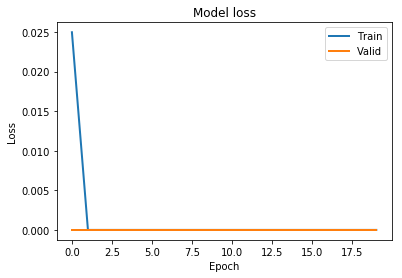

In [137]:
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

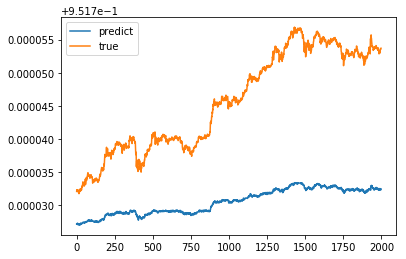

In [138]:
from matplotlib import *


yhat = model.predict(X_test1)
#yhat=yhat.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(y_test1, label='true')
pyplot.legend()
pyplot.show()

In [139]:
fitted_lambda

-1.0506737381299251

In [149]:
(7166.14^(fitted_lambda)-1)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [143]:
yhat_inverse = yhat*fitted_lambda +1 - exp(fitted_lambda)
testY_inverse = y_test1*fitted_lambda +1 - exp(fitted_lambda)

In [147]:
data['close'].values

array([ 7166.14,  7199.79,  7199.97, ..., 33576.82, 33803.02, 33897.06])

In [145]:
yhat_inverse

array([[-0.34965676],
       [-0.34965676],
       [-0.34965676],
       ...,
       [-0.34966224],
       [-0.34966224],
       [-0.34966236]], dtype=float32)

In [146]:
testY_inverse

array([[-0.34966197],
       [-0.34966222],
       [-0.3496621 ],
       ...,
       [-0.3496845 ],
       [-0.34968462],
       [-0.34968467]])

In [144]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.000


In [68]:
def create_model(lr=0.001, drop_CNN=0, drop_dense=0.2, kernel_size=3):
    model = Sequential()
    intput_shape=(X_train.shape[1], X_train.shape[2])
    model.add(Conv1D(128, kernel_size=kernel_size, padding = "same", activation="relu", input_shape = intput_shape))
    model.add(Dropout(drop_CNN))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(128,kernel_size=kernel_size, padding = "same", activation="relu"))
    model.add(Dropout(drop_CNN))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(units = 128, return_sequences=True))
    model.add(LSTM(units = 128, return_sequences=False))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(drop_dense))
    model.add(Dense(1, activation = 'linear'))
    opt = tensorflow.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse')

    return model

In [69]:
if False: 
    from keras.wrappers.scikit_learn import KerasRegressor
    from sklearn.model_selection import GridSearchCV


    model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=256)

    drop_CNN = [0, 0.2]
    drop_dense = [0.25, 0.5, 0.75]
    lr = [0.001, 0.01, 0.1]
    kernel_size = [3, 5]

    params = dict(lr=lr, drop_CNN=drop_CNN, drop_dense = drop_dense, kernel_size=kernel_size)
    model = GridSearchCV(estimator=model, param_grid=params, verbose=0, cv=5)
    grid_result = model.fit(X_train, y_train)
  # summarize results
    print("Best: %f using %s" % (model.best_score_, model.best_params_))
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Train on 8000 samples, validate on 1999 samples
Epoch 1/100
8000/8000 - 3s - loss: 0.0031 - val_loss: 0.0500
Epoch 2/100
8000/8000 - 0s - loss: 0.0037 - val_loss: 0.0726
Epoch 3/100
8000/8000 - 0s - loss: 0.0060 - val_loss: 0.1510
Epoch 4/100
8000/8000 - 0s - loss: 0.0057 - val_loss: 0.1651
Epoch 5/100
8000/8000 - 0s - loss: 0.0044 - val_loss: 0.0403
Epoch 6/100
8000/8000 - 0s - loss: 0.0041 - val_loss: 0.1708
Epoch 7/100
8000/8000 - 0s - loss: 0.0039 - val_loss: 0.0093
Epoch 8/100
8000/8000 - 0s - loss: 0.0026 - val_loss: 0.0316
Epoch 9/100
8000/8000 - 0s - loss: 0.0026 - val_loss: 0.0027
Epoch 10/100
8000/8000 - 0s - loss: 0.0014 - val_loss: 0.0638
Epoch 11/100
8000/8000 - 0s - loss: 0.0017 - val_loss: 0.0149
Epoch 12/100
8000/8000 - 0s - loss: 3.2440e-04 - val_loss: 0.0080
Epoch 13/100
8000/8000 - 0s - loss: 1.7226e-04 - val_loss: 0.0104
Epoch 14/100
8000/8000 - 0s - loss: 2.0030e-04 - val_loss: 0.0095
Epoch 15/100
8000/8000 - 0s - loss: 2.5956e-04 - val_loss: 0.0057
Epoch 16/100
80

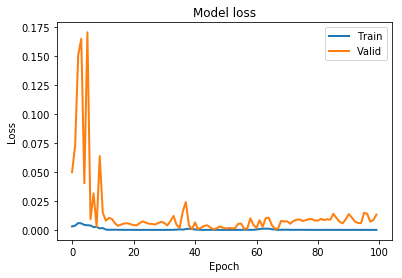

In [74]:
if True:
    model=create_model(lr=0.001, drop_CNN=0, drop_dense= 0.25, kernel_size=3)
    history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test,y_test),
                        shuffle=False, 
                        use_multiprocessing=True, verbose=2)
    
    plt.plot(history.history['loss'], linewidth=2, label='Train')
    plt.plot(history.history['val_loss'], linewidth=2, label='Valid')
    plt.legend(loc='upper right')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [66]:
second_input=Input(shape=(6,1))
in11=layers.Conv1D(filters=128, kernel_size=3,padding='same', activation='relu', input_shape=(6, 1))(second_input)
#in11=layers.MaxPooling1D(pool_size=2)(in11)

in22=layers.Conv1D(filters=32, kernel_size=4,padding='same', activation='relu', input_shape=(6, 1))(in11)
#in33=layers.Conv1D(filters=16, kernel_size=1, activation='relu')(in22)
in44=layers.MaxPooling1D(pool_size=2)(in22)
#in44=Dropout(0.5)(in44)
in44=TimeDistributed(Flatten())(in44)

#in55=layers.Flatten()(in44)
in11=layers.Bidirectional(LSTM(100,return_sequences=False))(in44)
#in11=layers.Bidirectional(LSTM(30))(in11)
#concat=layers.Concatenate()([in6, in11])
dens=layers.Dense(50,activation='relu')(in11)
#dens=Dropout(0.2)(dens)
dens=layers.Dense(1)(in11)

model=tf.keras.Model(inputs=second_input,outputs=dens)
model.compile(optimizer='adam', loss='mse')

In [85]:
first_input = Input(shape=(6,1))
in1=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(first_input)
in2=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in1)
in3=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in2)
in4=layers.MaxPooling1D(pool_size=2)(in3)
in5=layers.Flatten()(in4)
in6=layers.Dense(100)(in5)
#in6=layers.Dense(1)(in6)

second_input=Input(shape=(6,1))
#in11=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(second_input)
#in22=layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(6, 1))(in11)
#in33=layers.Conv1D(filters=128, kernel_size=1, activation='relu')(in22)
##in44=layers.MaxPooling1D(pool_size=2)(in33)
#in55=layers.Flatten()(in44)
in11=layers.Bidirectional(LSTM(100))(second_input)

concat=layers.Concatenate()([in6, in11])
#dens=layers.Dense(100,activation='relu')(concat)
dens=layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[first_input,second_input],outputs=[dens])
model.compile(optimizer='adam', loss='mse')


In [91]:
model.save('multiinput_rmse461_batch128_model.h5')


In [142]:
history=model.fit([X_train,X_train1], y_train, epochs=100, verbose=1,batch_size=128, validation_data=([X_test,X_test],y_test))

Train on 8000 samples, validate on 1999 samples
Epoch 1/100
8000/8000 [==============================] - 1s 118us/sample - loss: 0.0381 - val_loss: 0.2040
Epoch 2/100
8000/8000 [==============================] - 0s 41us/sample - loss: 6.9348e-04 - val_loss: 0.1242
Epoch 3/100
8000/8000 [==============================] - 0s 41us/sample - loss: 5.9620e-05 - val_loss: 0.1169
Epoch 4/100
8000/8000 [==============================] - 0s 41us/sample - loss: 4.6072e-05 - val_loss: 0.1114
Epoch 5/100
8000/8000 [==============================] - 0s 41us/sample - loss: 3.3505e-05 - val_loss: 0.1070
Epoch 6/100
8000/8000 [==============================] - 0s 41us/sample - loss: 2.4768e-05 - val_loss: 0.1031
Epoch 7/100
8000/8000 [==============================] - 0s 41us/sample - loss: 1.9573e-05 - val_loss: 0.1001
Epoch 8/100
8000/8000 [==============================] - 0s 41us/sample - loss: 1.8581e-05 - val_loss: 0.0977
Epoch 9/100
8000/8000 [==============================] - 0s 41us/sample - l

KeyboardInterrupt: 

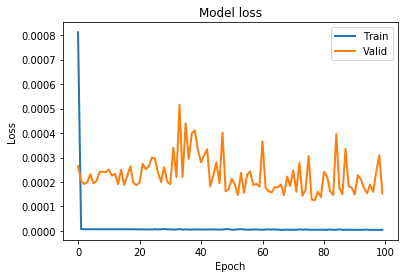

In [87]:
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

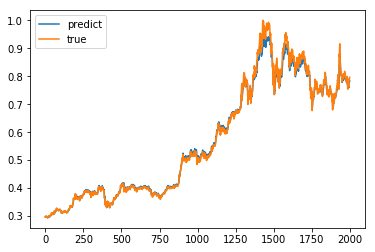

In [41]:
from matplotlib import *


yhat = model.predict(X_test)
yhat=yhat.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(y_test, label='true')
pyplot.legend()
pyplot.show()

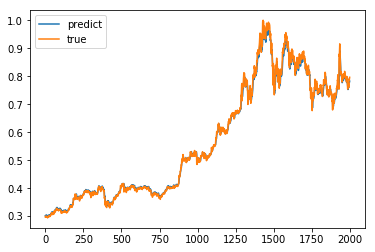

In [88]:
from matplotlib import *


yhat = model.predict([X_test,X_test])
yhat=yhat.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(y_test, label='true')
pyplot.legend()
pyplot.show()

In [95]:
yhat

array([[0.3012578 ],
       [0.3015705 ],
       [0.30269107],
       ...,
       [0.7792842 ],
       [0.77884036],
       [0.7824379 ]], dtype=float32)

In [96]:
yhat.reshape(-1,1)

array([[0.3012578 ],
       [0.3015705 ],
       [0.30269107],
       ...,
       [0.7792842 ],
       [0.77884036],
       [0.7824379 ]], dtype=float32)

In [94]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
yhat_inverse

array([[15462.586],
       [15474.236],
       [15515.978],
       ...,
       [33269.14 ],
       [33252.61 ],
       [33386.617]], dtype=float32)

In [89]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
testY_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

In [44]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 543.188


In [90]:
from math import *
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 461.292


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True) 

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()